In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('E:/project/network_traffic.csv')
df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [3]:
df.tail()

,date,l_ipn,r_asn,f
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1
20802,2006-09-30,9,8075,2


In [4]:
df.nunique()

date       92
l_ipn      10
r_asn    2005
f         707
dtype: int64

In [5]:
df.shape

(20803, 4)

In [6]:
df.isnull()

,date,l_ipn,r_asn,f
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20798,False,False,False,False
20799,False,False,False,False
20800,False,False,False,False
20801,False,False,False,False


In [7]:
df.isna().sum()

date     0
l_ipn    0
r_asn    0
f        0
dtype: int64

In [8]:
df.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [9]:
df['date']= pd.to_datetime(df['date'])
df = df.groupby(['date','l_ipn'],as_index=False).sum()

In [10]:
print('Number of days for which data is available {:d}'.format(df['date'].nunique()))
print('local ip {:d}'.format(df['l_ipn'].nunique()))
print('remote ASN {:d}'.format(df['r_asn'].nunique()))
print('Minimum flow count per day {:d}'.format(df['f'].min()))
print('Maximum flow count per day {:d}'.format(df['f'].max()))

Number of days for which data is available 92
local ip 10
remote ASN 824
Minimum flow count per day 4
Maximum flow count per day 785297


In [11]:
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek

In [12]:
df.nunique()

date      92
l_ipn     10
r_asn    824
f        590
yday      92
wday       7
dtype: int64

In [13]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])
ip0.head(5)

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6
20,2006-07-03,0,436624,249,184,0
30,2006-07-04,0,499290,2971,185,1
40,2006-07-05,0,423638,158,186,2


In [14]:
df[(df["date"]=="2006-08-24") & (df["l_ipn"]==1)]


,date,l_ipn,r_asn,f,yday,wday
541,2006-08-24,1,313925,5482,236,3


In [15]:
dic = {'2006-08-24':1,'2006-09-04':5,'2006-09-18':4,'2006-09-26':3,'2006-09-26':6}
marked_anomalies = pd.DataFrame.from_dict(dic,orient='index')
marked_anomalies.reset_index(inplace = True)
marked_anomalies.columns = ['date','l_ipn']
print(marked_anomalies)

         date  l_ipn
0  2006-08-24      1
1  2006-09-04      5
2  2006-09-18      4
3  2006-09-26      6


Text(0.5, 1.0, 'Local IP 9 Flow')

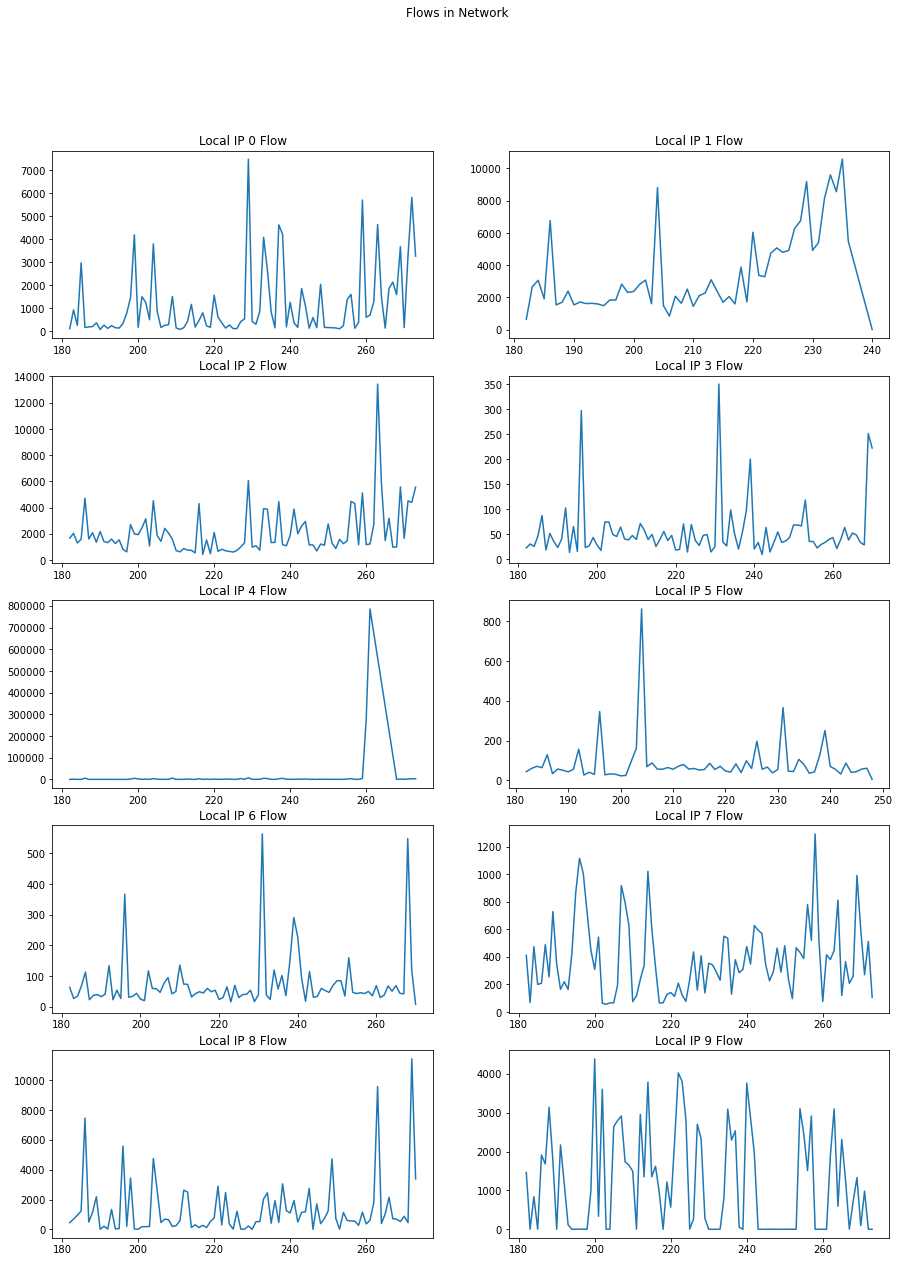

In [16]:
f,axarray = plt.subplots(5,2,figsize=(15,20))
plt.suptitle('Flows in Network')

axarray[0,0].plot(ip0['yday'],ip0['f'])
axarray[0,0].set_title("Local IP 0 Flow")

axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].set_title("Local IP 1 Flow")

axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_title("Local IP 2 Flow")

axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_title("Local IP 3 Flow")

axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_title("Local IP 4 Flow")

axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_title("Local IP 5 Flow")

axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_title("Local IP 6 Flow")

axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_title("Local IP 7 Flow")

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_title("Local IP 8 Flow")

axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_title("Local IP 9 Flow")


In [17]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1][0:len(ip1['f'])-5]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4][0:len(ip4['f'])-7]
max4=np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6][0:len(ip1['f'])-9]
max6 = np.max(ip6['f'])

Text(0.5, 1.0, 'Local IP 6 Flow')

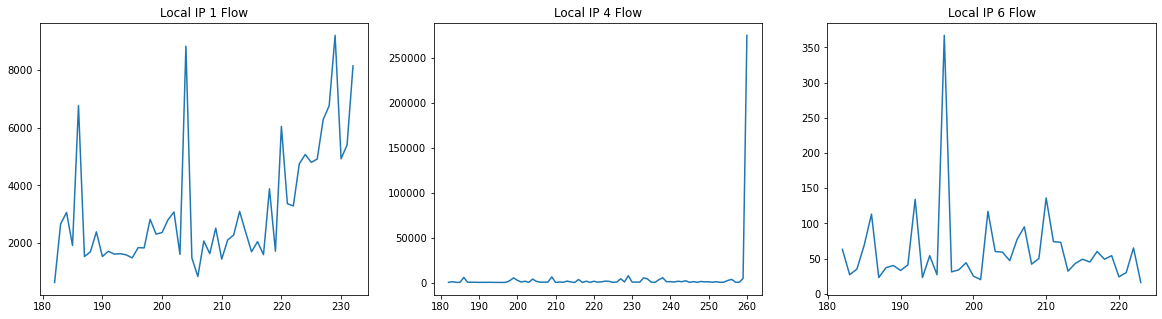

In [18]:
f,axarray = plt.subplots(1,3,figsize=(20,5))
axarray[0].plot(ip1['yday'],ip1['f'])
axarray[0].set_title("Local IP 1 Flow")
axarray[1].plot(ip4['yday'], ip4['f'])
axarray[1].set_title("Local IP 4 Flow")
axarray[2].plot(ip6['yday'],ip6['f'])
axarray[2].set_title("Local IP 6 Flow")


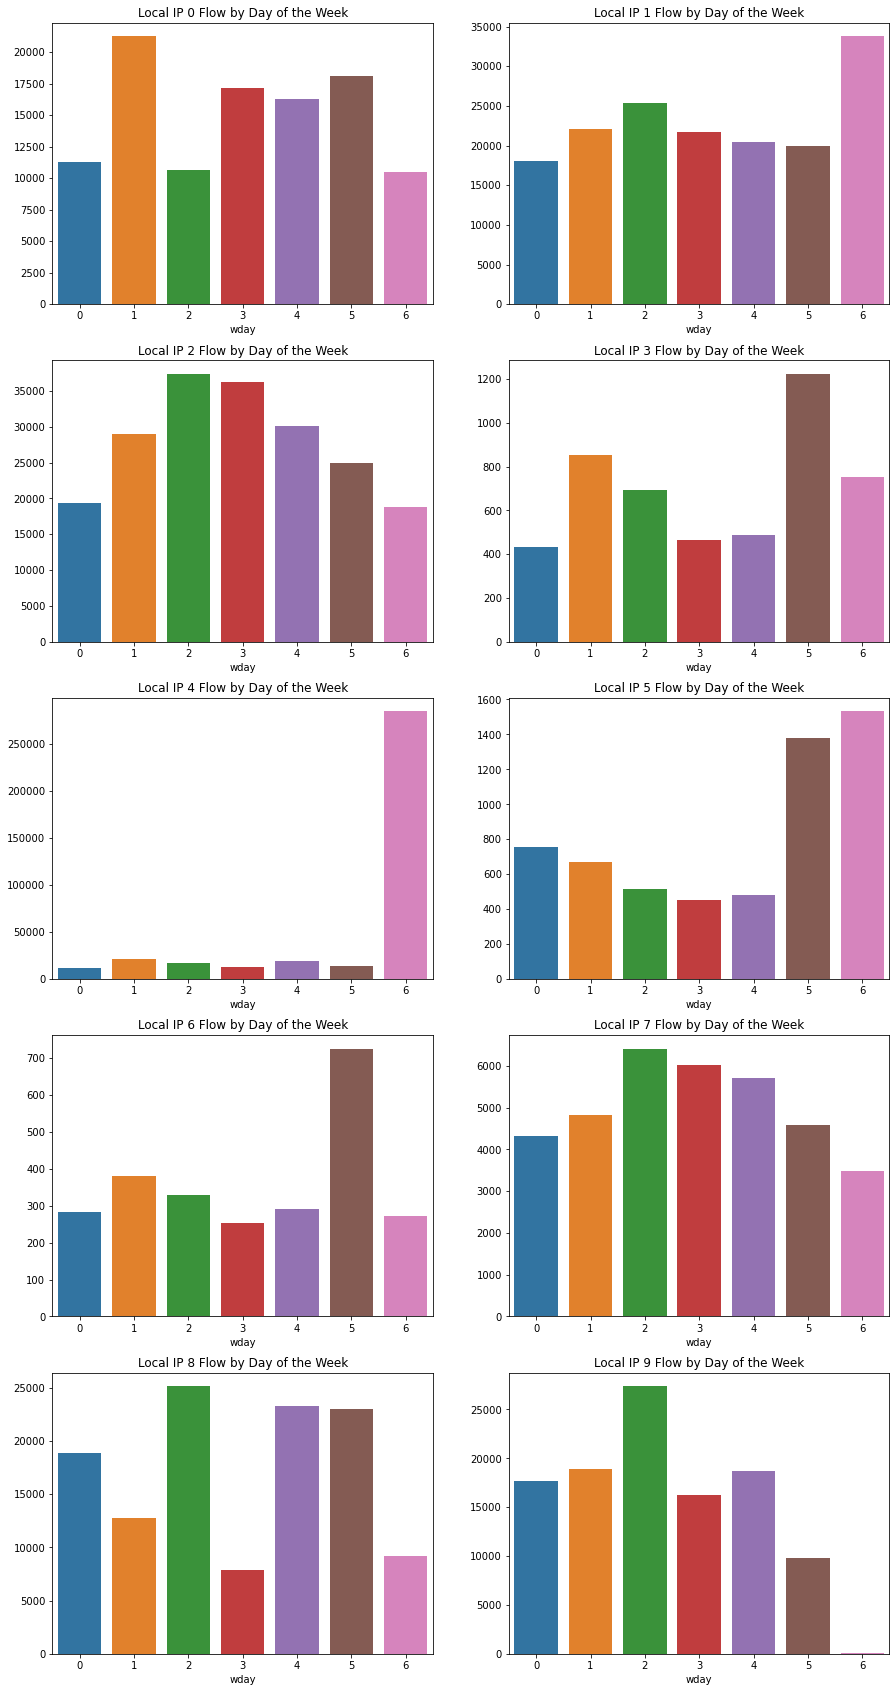

In [19]:
f,axarray = plt.subplots(5,2,figsize=(15,30))
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip0.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,0])
axarray[0,0].set_title("Local IP 0 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip1.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,1])
axarray[0,1].set_title("Local IP 1 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip2.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,0])
axarray[1,0].set_title("Local IP 2 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip3.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,1])
axarray[1,1].set_title("Local IP 3 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip4.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,0])
axarray[2,0].set_title("Local IP 4 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip5.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,1])
axarray[2,1].set_title("Local IP 5 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip6.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,0])
axarray[3,0].set_title("Local IP 6 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip7.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,1])
axarray[3,1].set_title("Local IP 7 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip8.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,0])
axarray[4,0].set_title("Local IP 8 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip9.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,1])
axarray[4,1].set_title("Local IP 9 Flow by Day of the Week")

plt.show()


In [20]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [21]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset['f'].iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [22]:
from keras.layers.wrappers import TimeDistributed
from keras.constraints import nonneg
look_back = 14

def trainModel(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    model = Sequential()
    model.add(GRU(64,input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=0)
    return model

In [23]:
def predictFlow(_model,data):
    ypred=[0]*look_back
    for k in range(len(data)-look_back):
        pattern = data[k:k+look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        ypred.append(_model.predict(x)[0][0])
    
    return ypred

In [24]:
m0 = trainModel(ip0[['f','wday']].copy())
m1 = trainModel(ip1[['f','wday']].copy())
m2 = trainModel(ip2[['f','wday']].copy())
m3 = trainModel(ip3[['f','wday']].copy())
m4 = trainModel(ip4[['f','wday']].copy())
m5 = trainModel(ip5[['f','wday']].copy())
m6 = trainModel(ip6[['f','wday']].copy())
m7 = trainModel(ip7[['f','wday']].copy())
m8 = trainModel(ip8[['f','wday']].copy())
m9 = trainModel(ip9[['f','wday']].copy())

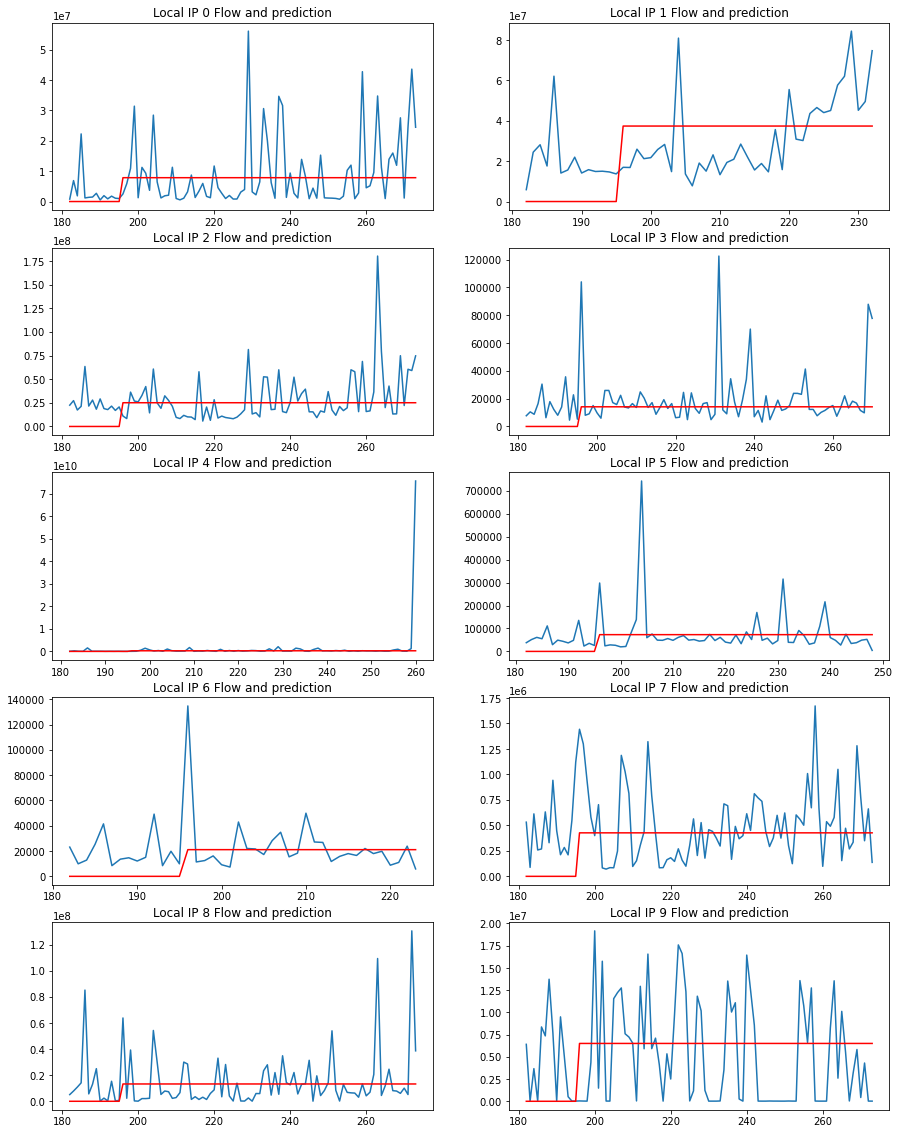

In [25]:
f,axarray = plt.subplots(5,2,figsize=(15,20))

ypred0 = np.multiply(predictFlow(m0,ip0[['f','wday']].copy()),max0)
ip0f = np.multiply(ip0['f'],max0)
ypred1 = np.multiply(predictFlow(m1,ip1[['f','wday']].copy()),max1)
ip1f = np.multiply(ip1['f'],max1)
ypred2 = np.multiply(predictFlow(m2,ip2[['f','wday']].copy()),max2)
ip2f = np.multiply(ip2['f'],max2)
ypred3 = np.multiply(predictFlow(m3,ip3[['f','wday']].copy()),max3)
ip3f = np.multiply(ip3['f'],max3)
ypred4 = np.multiply(predictFlow(m4,ip4[['f','wday']].copy()),max4)
ip4f = np.multiply(ip4['f'],max4)
ypred5 = np.multiply(predictFlow(m5,ip5[['f','wday']].copy()),max5)
ip5f = np.multiply(ip5['f'],max5)
ypred6 = np.multiply(predictFlow(m6,ip6[['f','wday']].copy()),max6)
ip6f = np.multiply(ip6['f'],max6)
ypred7 = np.multiply(predictFlow(m7,ip7[['f','wday']].copy()),max7)
ip7f = np.multiply(ip7['f'],max7)
ypred8 = np.multiply(predictFlow(m8,ip8[['f','wday']].copy()),max8)
ip8f = np.multiply(ip8['f'],max8)
ypred9 = np.multiply(predictFlow(m9,ip9[['f','wday']].copy()),max9)
ip9f = np.multiply(ip9['f'],max9)

axarray[0,0].plot(ip0['yday'],ip0f)
axarray[0,0].plot(ip0['yday'],ypred0,color='r')
axarray[0,0].set_title("Local IP 0 Flow and prediction")

axarray[0,1].plot(ip1['yday'], ip1f)
axarray[0,1].plot(ip1['yday'], ypred1,color='r',alpha=1)
axarray[0,1].set_title("Local IP 1 Flow and prediction")

axarray[1,0].plot(ip2['yday'], ip2f)
axarray[1,0].plot(ip2['yday'], ypred2,color='r',alpha=1)
axarray[1,0].set_title("Local IP 2 Flow and prediction")

axarray[1,1].plot(ip3['yday'], ip3f)
axarray[1,1].plot(ip3['yday'], ypred3,color='r',alpha=1)
axarray[1,1].set_title("Local IP 3 Flow and prediction")

axarray[2,0].plot(ip4['yday'], ip4f)
axarray[2,0].plot(ip4['yday'], ypred4,color='r',alpha=1)
axarray[2,0].set_title("Local IP 4 Flow and prediction")

axarray[2,1].plot(ip5['yday'], ip5f)
axarray[2,1].plot(ip5['yday'], ypred5,color='r',alpha=1)
axarray[2,1].set_title("Local IP 5 Flow and prediction")

axarray[3,0].plot(ip6['yday'], ip6f)
axarray[3,0].plot(ip6['yday'], ypred6,color='r',alpha=1)
axarray[3,0].set_title("Local IP 6 Flow and prediction")

axarray[3,1].plot(ip7['yday'], ip7f)
axarray[3,1].plot(ip7['yday'], ypred7,color='r',alpha=1)
axarray[3,1].set_title("Local IP 7 Flow and prediction")

axarray[4,0].plot(ip8['yday'], ip8f)
axarray[4,0].plot(ip8['yday'], ypred8,color='r',alpha=1)
axarray[4,0].set_title("Local IP 8 Flow and prediction")

axarray[4,1].plot(ip9['yday'], ip9f)
axarray[4,1].plot(ip9['yday'], ypred9,color='r',alpha=1)
axarray[4,1].set_title("Local IP 9 Flow and prediction")

plt.show()


In [26]:
corr0 = pd.Series(ip0f).corr(pd.Series(ypred0))
corr1 = pd.Series(ip1f).corr(pd.Series(ypred1))
corr2 = pd.Series(ip2f).corr(pd.Series(ypred2))
corr3 = pd.Series(ip3f).corr(pd.Series(ypred3))
corr4 = pd.Series(ip4f).corr(pd.Series(ypred4))
corr5 = pd.Series(ip5f).corr(pd.Series(ypred5))
corr6 = pd.Series(ip6f).corr(pd.Series(ypred6))
corr7 = pd.Series(ip7f).corr(pd.Series(ypred7))
corr8 = pd.Series(ip8f).corr(pd.Series(ypred8))
corr9 = pd.Series(ip9f).corr(pd.Series(ypred9))
corrdf = pd.DataFrame({'corr0':[corr0],
                       'corr1':[corr1],
                       'corr2':[corr2],
                       'corr3':[corr3],
                       'corr4':[corr4],
                       'corr5':[corr5],
                       'corr6':[corr6],
                       'corr7':[corr7],
                       'corr8':[corr8],
                       'corr9':[corr9]})
corrdf.head()

,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
0,0.020364,0.54083,0.109593,0.301767,0.179599,0.310756,-0.469023,-0.109295,0.194031,-0.091518


In [27]:
ip0 = df[df['l_ipn']==0]
ip1 = df[df['l_ipn']==1][0:len(df[df['l_ipn']==1])-5]
ip2 = df[df['l_ipn']==2]
ip3 = df[df['l_ipn']==3]
ip4 = df[df['l_ipn']==4][0:len(df[df['l_ipn']==4])-7]
ip5 = df[df['l_ipn']==5]
ip6 = df[df['l_ipn']==6]
ip7 = df[df['l_ipn']==7]
ip8 = df[df['l_ipn']==8]
ip9 = df[df['l_ipn']==9]

In [28]:
def ApEn(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))


In [29]:
m=2
r = 3
e0 = ApEn(np.multiply(ip0['f'].values,1),m,r)
e1 = ApEn(np.multiply(ip1['f'].values,1),m,r)
e2 = ApEn(np.multiply(ip2['f'].values,1),m,r)
e3 = ApEn(np.multiply(ip3['f'].values,1),m,r)
e4 = ApEn(np.multiply(ip4['f'].values,1),m,r)
e5 = ApEn(np.multiply(ip5['f'].values,1),m,r)
e6 = ApEn(np.multiply(ip6['f'].values,1),m,r)
e7 = ApEn(np.multiply(ip7['f'].values,1),m,r)
e8 = ApEn(np.multiply(ip8['f'].values,1),m,r)
e9 = ApEn(np.multiply(ip9['f'].values,1),m,r)

In [30]:
ent_values = pd.DataFrame({'e0':[e0], 'e1':[e1],'e2':[e2],'e3':[e3],'e4':[e4],'e5':[e5],
              'e6':[e6],'e7':[e7],'e8':[e8],'e9':[e9]})
ent_values.head()


,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9
0,0.01105,0.020203,0.01105,0.360497,0.012903,0.169414,0.286478,0.004184,0.01105,0.264248


In [31]:
def entropyTrend(data,d):
    etrend = [ApEn(np.multiply(data[n:n+d].values,1),2,3) for n in range(len(data)-d)]
    return etrend

Text(0.5, 1.0, 'Local IP 9 ApEn Variation')

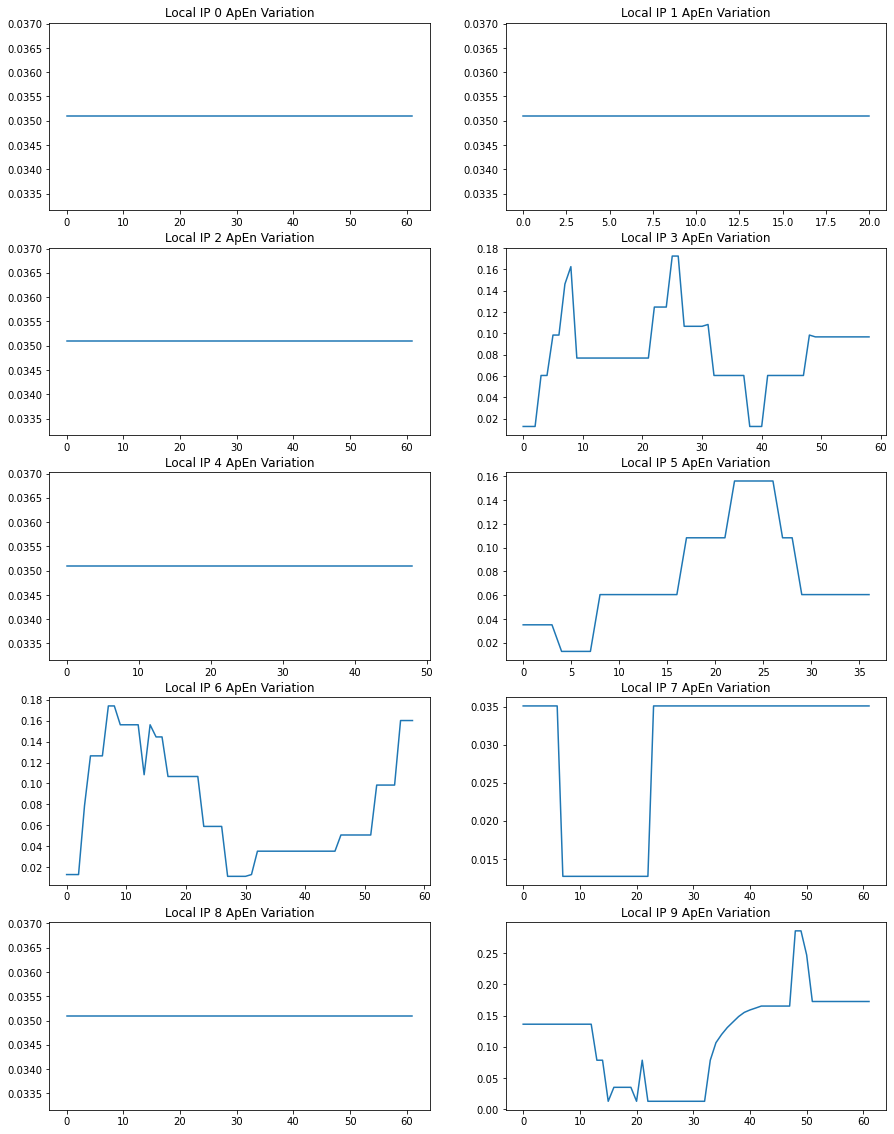

In [32]:
f,axarray = plt.subplots(5,2,figsize=(15,20))
days = 30
et0 = entropyTrend(ip0['f'],days)
axarray[0,0].plot(range(len(et0)),et0)
axarray[0,0].set_title("Local IP 0 ApEn Variation")

et1 = entropyTrend(ip1['f'],days)
axarray[0,1].plot(range(len(et1)),et1)
axarray[0,1].set_title("Local IP 1 ApEn Variation")

et2 = entropyTrend(ip2['f'],days)
axarray[1,0].plot(range(len(et2)),et2)
axarray[1,0].set_title("Local IP 2 ApEn Variation")

et3 = entropyTrend(ip3['f'],days)
axarray[1,1].plot(range(len(et3)),et3)
axarray[1,1].set_title("Local IP 3 ApEn Variation")

et4 = entropyTrend(ip4['f'],days)
axarray[2,0].plot(range(len(et4)),et4)
axarray[2,0].set_title("Local IP 4 ApEn Variation")
et5 = entropyTrend(ip5['f'],days)
axarray[2,1].plot(range(len(et5)),et5)
axarray[2,1].set_title("Local IP 5 ApEn Variation")

et6 = entropyTrend(ip6['f'],days)
axarray[3,0].plot(range(len(et6)),et6)
axarray[3,0].set_title("Local IP 6 ApEn Variation")

et7 = entropyTrend(ip7['f'],days)
axarray[3,1].plot(range(len(et7)),et7)
axarray[3,1].set_title("Local IP 7 ApEn Variation")

et8 = entropyTrend(ip8['f'],days)
axarray[4,0].plot(range(len(et8)),et8)
axarray[4,0].set_title("Local IP 8 ApEn Variation")

et9 = entropyTrend(ip9['f'],days)
axarray[4,1].plot(range(len(et9)),et9)
axarray[4,1].set_title("Local IP 9 ApEn Variation")